# Training Deep Q-Learning Agent

In [1]:
import gymnasium as gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from SARSA import SarsaAgent

In [2]:
# define environment
env = gym.make('LunarLander-v2', render_mode='rgb_array')

# define parameters
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
episodes = 200
batch_size = 64

# define and train agent
agent = SarsaAgent(env)
returns, steps = agent.training(env, batch_size, episodes)

env.close()

episode: 1/200, return: -109, epsilon: 0.96, steps: 86
episode: 2/200, return: 20, epsilon: 0.83, steps: 74
episode: 3/200, return: -84, epsilon: 0.72, steps: 70
episode: 4/200, return: -99, epsilon: 0.59, steps: 103
episode: 5/200, return: -173, epsilon: 0.47, steps: 113
episode: 6/200, return: -149, epsilon: 0.37, steps: 120
episode: 7/200, return: -106, epsilon: 0.29, steps: 128
episode: 8/200, return: -125, epsilon: 0.20, steps: 180
episode: 9/200, return: -251, epsilon: 0.13, steps: 206
episode: 10/200, return: -267, epsilon: 0.11, steps: 76
episode: 11/200, return: -59, epsilon: 0.09, steps: 113
episode: 12/200, return: -266, epsilon: 0.06, steps: 207
episode: 13/200, return: 30, epsilon: 0.05, steps: 132
episode: 14/200, return: -93, epsilon: 0.03, steps: 188
episode: 15/200, return: -269, epsilon: 0.02, steps: 183
episode: 16/200, return: -207, epsilon: 0.02, steps: 157
episode: 17/200, return: -253, epsilon: 0.01, steps: 133
episode: 18/200, return: -244, epsilon: 0.01, steps:

In [3]:
print(f'Average return: {np.mean(returns)}')
print(f'Average return last 50 episodes: {np.mean(returns[-50:])}')

Average return: -42.15876741588178
Average return last 50 episodes: 131.84635484415318


/Users/riccardo/opt/anaconda3/envs/main/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/riccardo/opt/anaconda3/envs/main/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/riccardo/opt/anaconda3/envs/main/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/riccardo/opt/anaconda3/envs/main/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na 

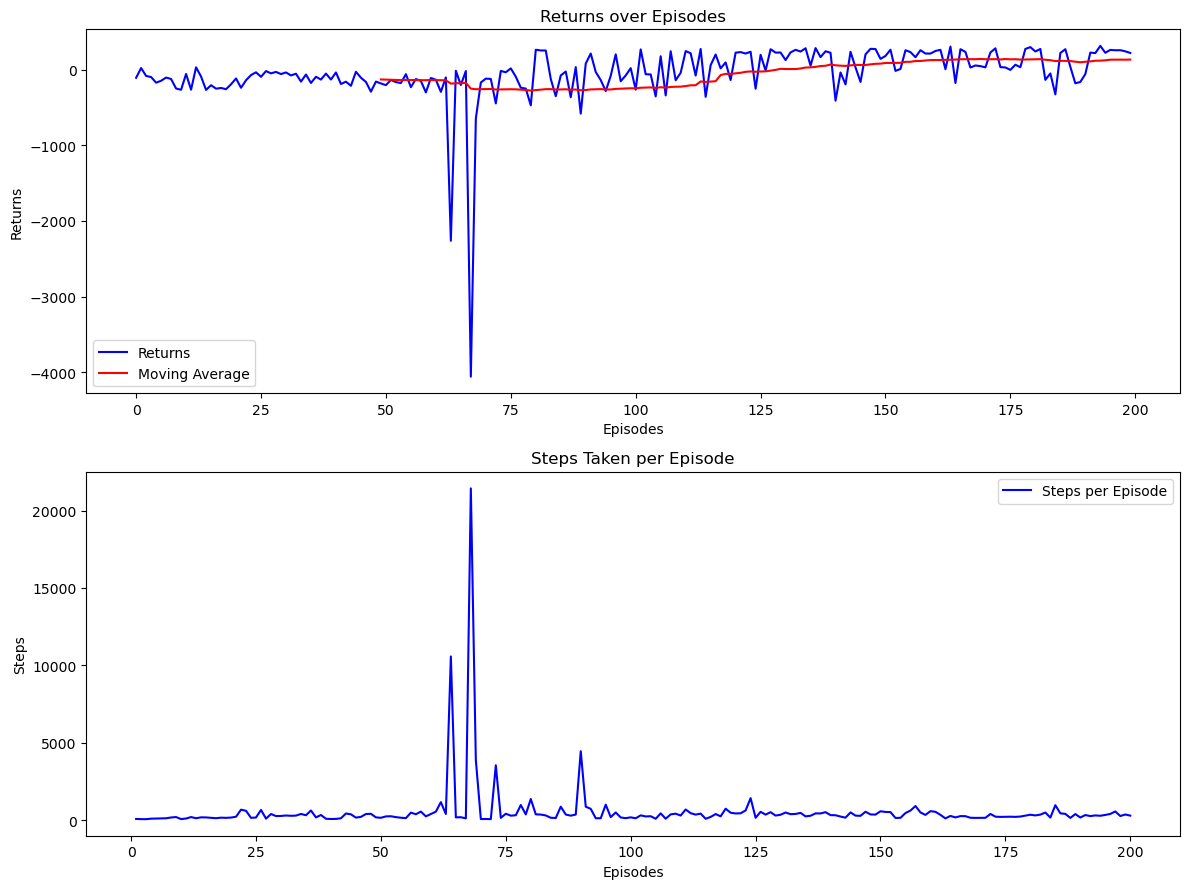

In [4]:
MA = pd.Series(returns).rolling(window=50).mean()
episodes = list(steps.keys())
steps_data = list(steps.values())

# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 9))

# Plot returns and moving average
sns.lineplot(data=returns, label='Returns', color='blue', ax=axs[0])
sns.lineplot(data=MA, label='Moving Average', color='red', ax=axs[0])
axs[0].set_ylabel('Returns')
axs[0].set_xlabel('Episodes')
axs[0].set_title('Returns over Episodes')
axs[0].legend()

# Plot steps taken per episode
sns.lineplot(x=episodes, y=steps_data, label='Steps per Episode', color='blue', ax=axs[1])
axs[1].set_ylabel('Steps')
axs[1].set_xlabel('Episodes')
axs[1].set_title('Steps Taken per Episode')
axs[1].legend()

plt.tight_layout()
plt.show()